In [1]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io, color

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

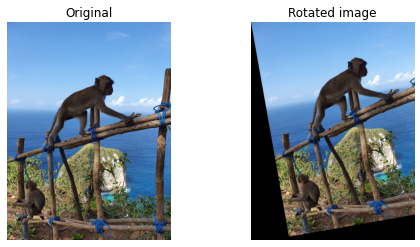

In [3]:
im_org = io.imread('data/NusaPenida.png')
rotation_angle = 10
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
#rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

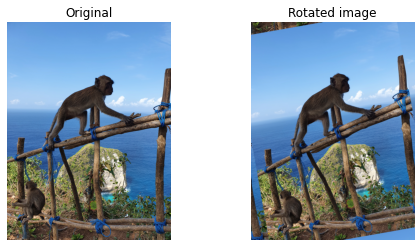

In [5]:
rotated_img = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(im_org, rotated_img, "Rotated image")

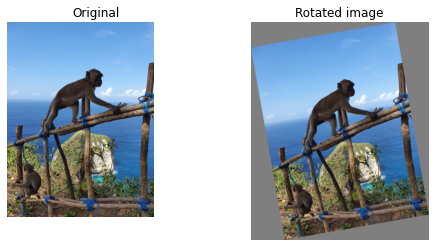

In [10]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=0.5)
show_comparison(im_org, rotated_img, "Rotated image")

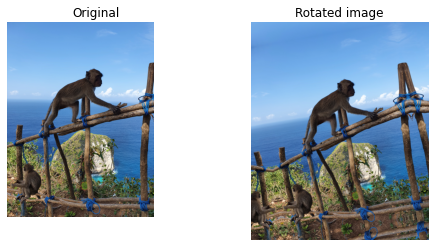

In [12]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode='reflect')
show_comparison(im_org, rotated_img, "Rotated image")

In [13]:
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


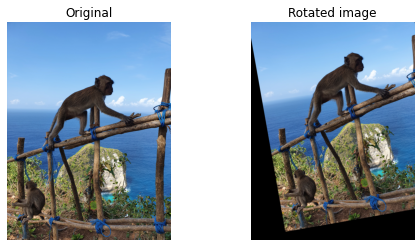

In [14]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")

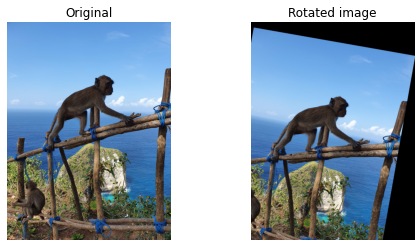

In [15]:
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Rotated image")

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


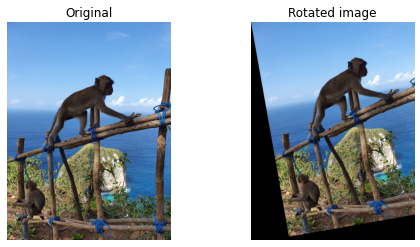

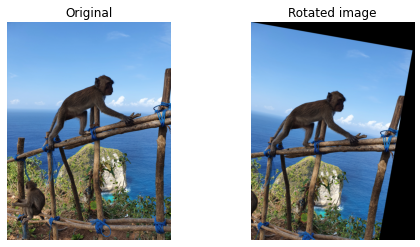

In [18]:
rotation_angle = 10.0 * math.pi / 180.
trans = [0, 0]
tform = EuclideanTransform(rotation=rotation_angle)#, translation=trans)
print(tform.params)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")
transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Rotated image")

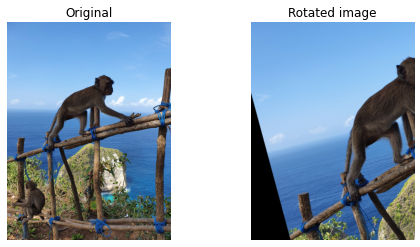

In [20]:
rotation_angle = 15.0 * math.pi / 180
trans = [40,30]
tform = SimilarityTransform(rotation=rotation_angle,translation=trans,scale=0.6)
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")

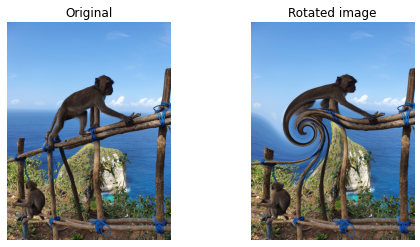

In [22]:
str = 10
rad = 300
c = [200, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "Rotated image")

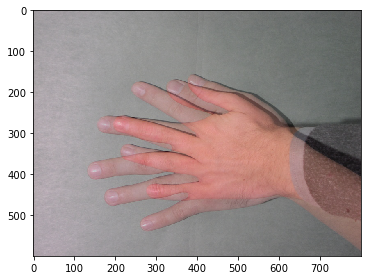

In [24]:
from skimage.util import img_as_float
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

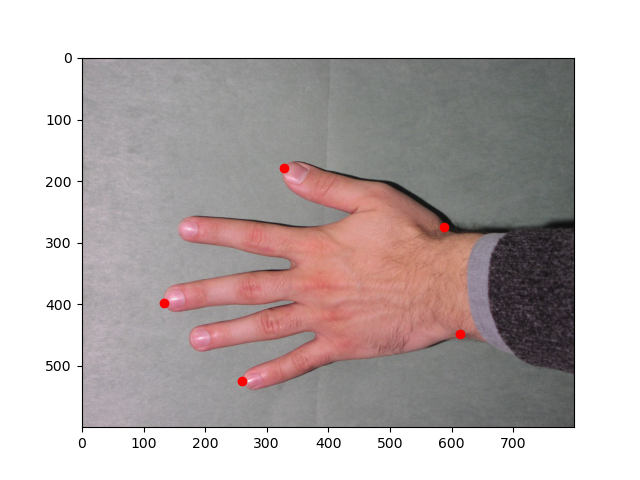

In [34]:
import numpy as np
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

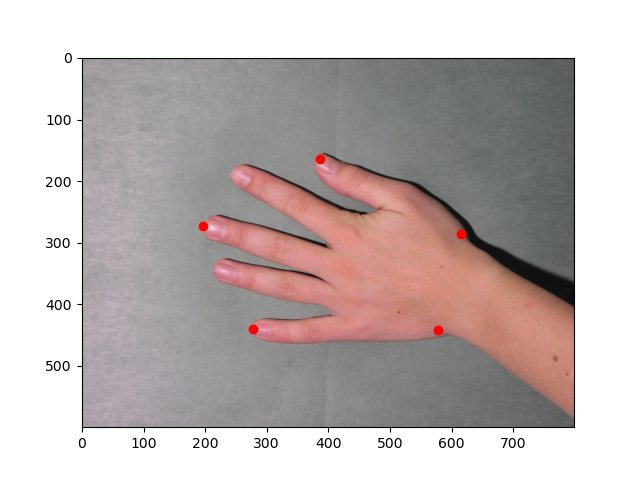

In [37]:
%matplotlib widget
dst = np.array([[615, 286], [387, 164], [197, 273], [278, 440], [578, 442]])
plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

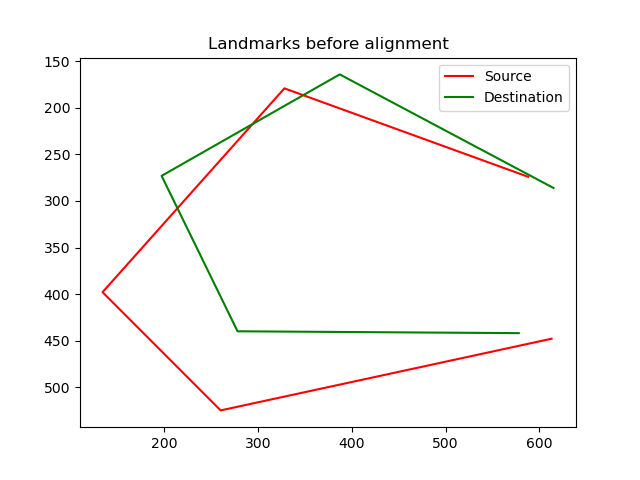

In [38]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [39]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 32983


In [42]:
from skimage.transform import matrix_transform
tform = EuclideanTransform()
tform.estimate(src, dst)
src_transform = matrix_transform(src, tform.params)

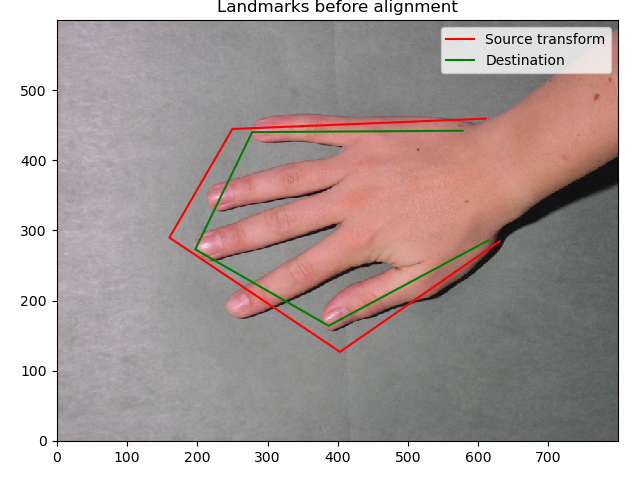

In [43]:
fig, ax = plt.subplots()
io.imshow(dst_img)
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source transform")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [44]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 5716.384180830592


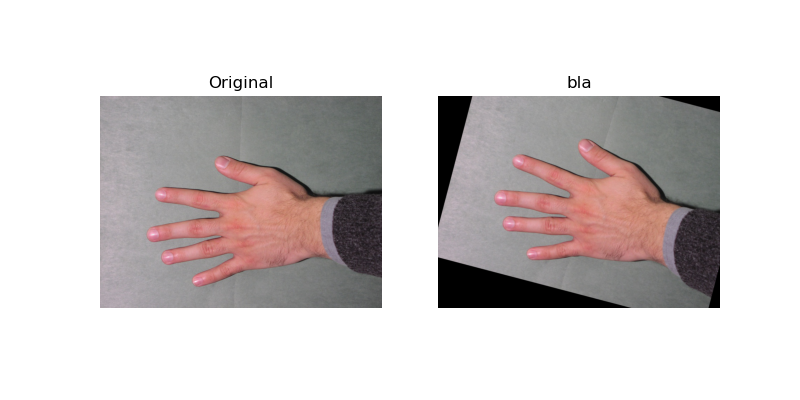

In [46]:
warped = warp(src_img, tform.inverse)
show_comparison(src_img,warped,'bla')

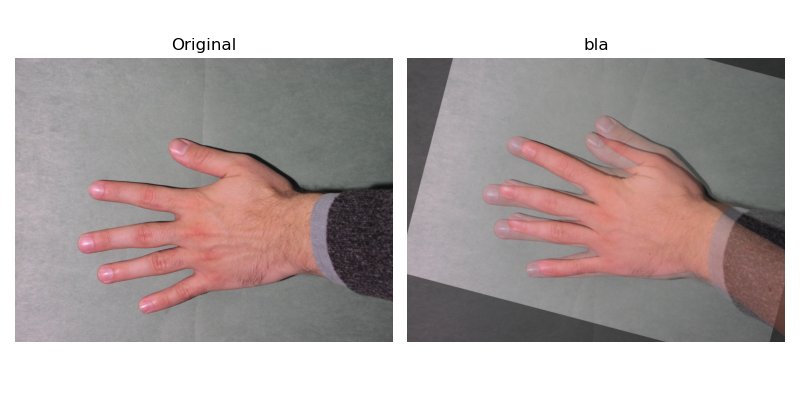

In [49]:
blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
plt.imshow(blend)
plt.show()